### ML-A1 Implementation of Linear regression
- Instructions
    - Prepare a report to present your findings 
    - Write a python code to implement stochastic gradient descent from scratch for the given house price prediction dataset.
    - Write a python code to implement stochastic gradient descent using scikit-learn for the given data and compare the output.
    - Write a python code to implement batch gradient descent from scratch and also using scikit-lean for the given house price prediction.
    - Compare the output of all the implementations and write conclusion.

    Dataset: [House Price Prediction Challenge (kaggle.com)](https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge/data)

- Submission Intruction:
    - Submission should include python notebook file for all the implementations.
    - There must be a report pdf file to illustrate your data science lifecycle implementation and present your finds. Report must not exceed 10 page or 1500 words. 


#### Table of Content
1. Problem Statement
2. Data Understanding
3. Data Preparation
4. Modeling  
  4.1. SGD using scikit-learn   
  4.2  Batch Gradient Descent using scikit-learn   
  4.3  SGD Scratch Implementation   
  4.4  Batch Gradient Descent Scratch Implementation   

#### Data Ingestion/Loading
- Load the necessary modules
- Load the data
- process the data


## Stocastic Gradient Descent Implmentation

In [1]:
# loading the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (18,6)


np.random.seed(32)
# data path
train_data  = "/home/suman/Applied-Machine-Learning/Linear Regression/train.csv"
test_data = "/home/suman/Applied-Machine-Learning/Linear Regression/test.csv"

# load the train and test data
df_train  = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

df_train.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


#### Data Understanding and Exploration
The dataset used for this assignmetn is from Kaggle Dataset: [House Price Prediction Challenge (kaggle.com)](https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge/data)

- **Training Splits:** 29451 rows x 12 columns
- **Testing Splits:** 68720 x 11 columns
  - since we are using compettion data testing data do not contain the labels, they are evaluated based on this splits.
  
- **Attributes of the Dataset**


    | Column               | Description                                      |
    |----------------------|--------------------------------------------------|       
    | POSTED_BY            | Category marking who has listed the property     |
    | UNDER_CONSTRUCTION   | Under Construction or Not                        |
    | RERA                 | Rera approved or Not                             |
    | BHK_NO               | Number of Rooms                                  |
    | BHK_OR_RK            | Type of property                                 |
    | SQUARE_FT            | Total area of the house in square feet           |
    | READY_TO_MOVE        | Category marking Ready to move or Not            |
    | RESALE               | Category marking Resale or not                   |
    | ADDRESS              | Address of the property                          |
    | LONGITUDE            | Longitude of the property                        |
    | LATITUDE             | Latitude of the property                         |
  
 RERA stands for Real Estate (Regulation and Development) Act, which was enacted by the Indian government in 2016. It aims to protect home buyers and ensure transparency in the real estate sector. RERA establishes regulatory authorities at the state level to oversee real estate transactions and address grievances.


In [2]:
print(f'The train dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.')
print(f'The test dataset contains {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

The train dataset contains 29451 rows and 12 columns.
The test dataset contains 68720 rows and 11 columns.


In [3]:
# info of the dateset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


- since we are solving linear regression problem, the target or dependent variable must be continous and here we can see that it is continous
- rest we can see that there are total of three dtypes
- there are two categorical variable which are useful: `BHK_OR_RK` and `POSTED_BY`              

#### Exploration and Descriptive Statistics

In [4]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
# categorical data

df_train.describe(exclude=["float", "int"])

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


In [6]:
# check for null values
df_train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

##### Interpretations:
- there are numerical and categorical variables
- the dataset have no missing records (since this is competition data it is already been curated)
- target/depedent variable is continous (as float dtype)

#### Basic EDA

In [7]:
df_train['POSTED_BY'].value_counts()

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [8]:
df_train['UNDER_CONSTRUCTION'].value_counts()

UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64

<BarContainer object of 2 artists>

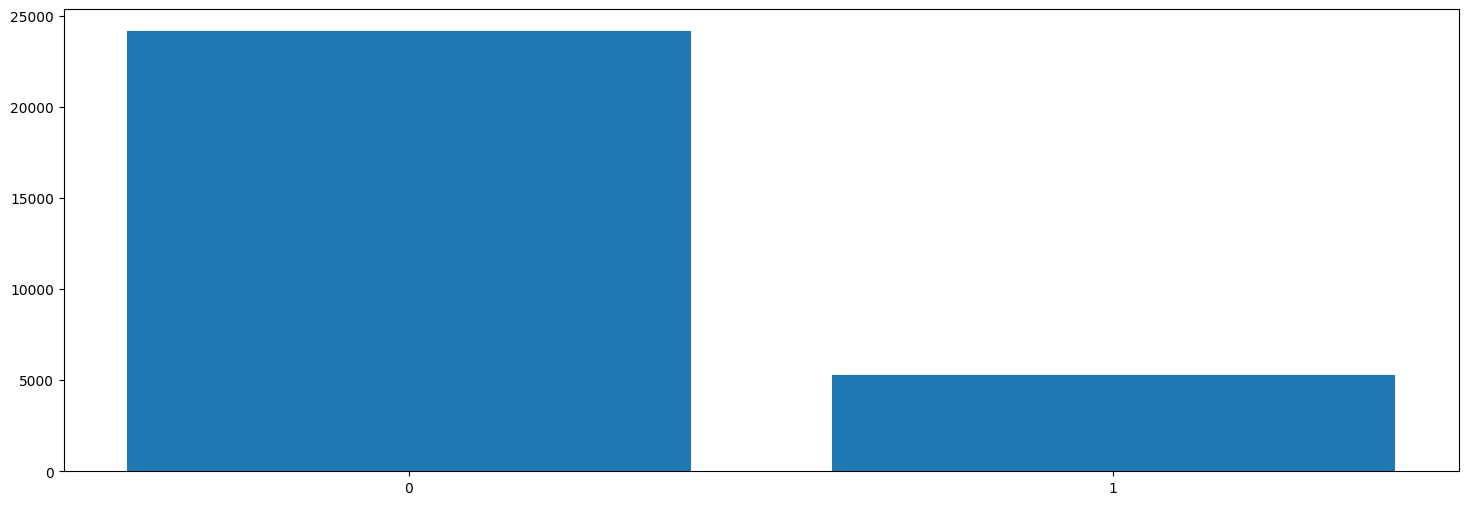

In [9]:
plt.bar(["0","1"],df_train["UNDER_CONSTRUCTION"].value_counts())

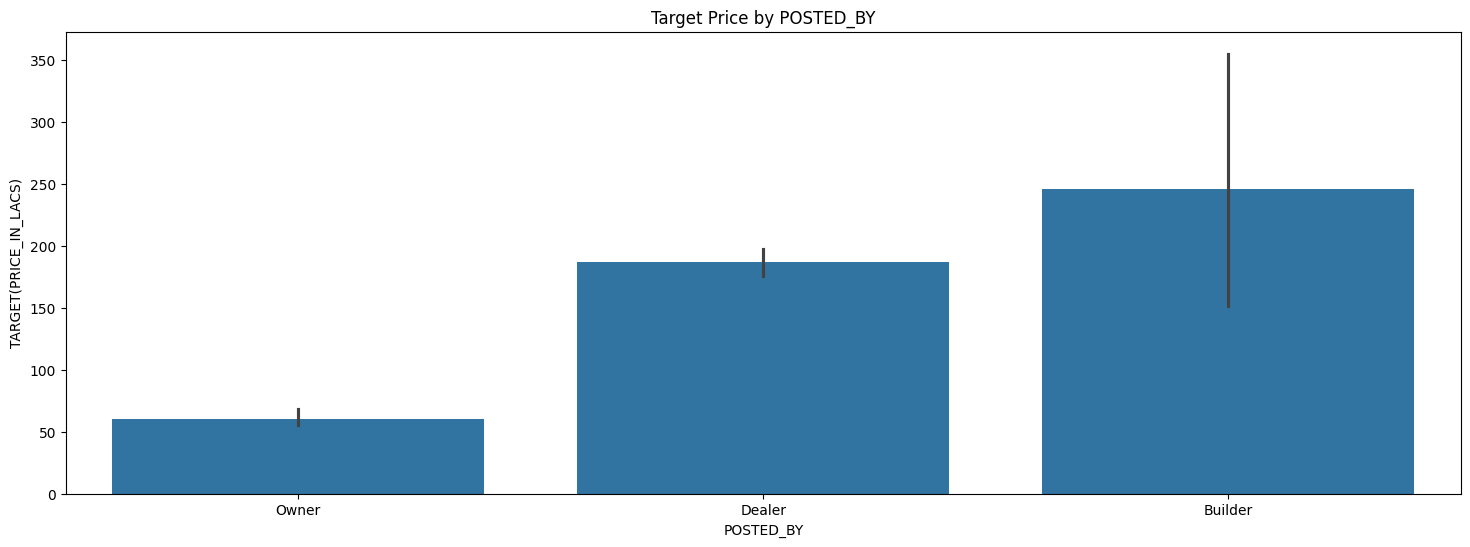

In [10]:
sns.barplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=df_train)
plt.title('Target Price by POSTED_BY')
plt.show()

# looks like majority of the property listinga re made dealers

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

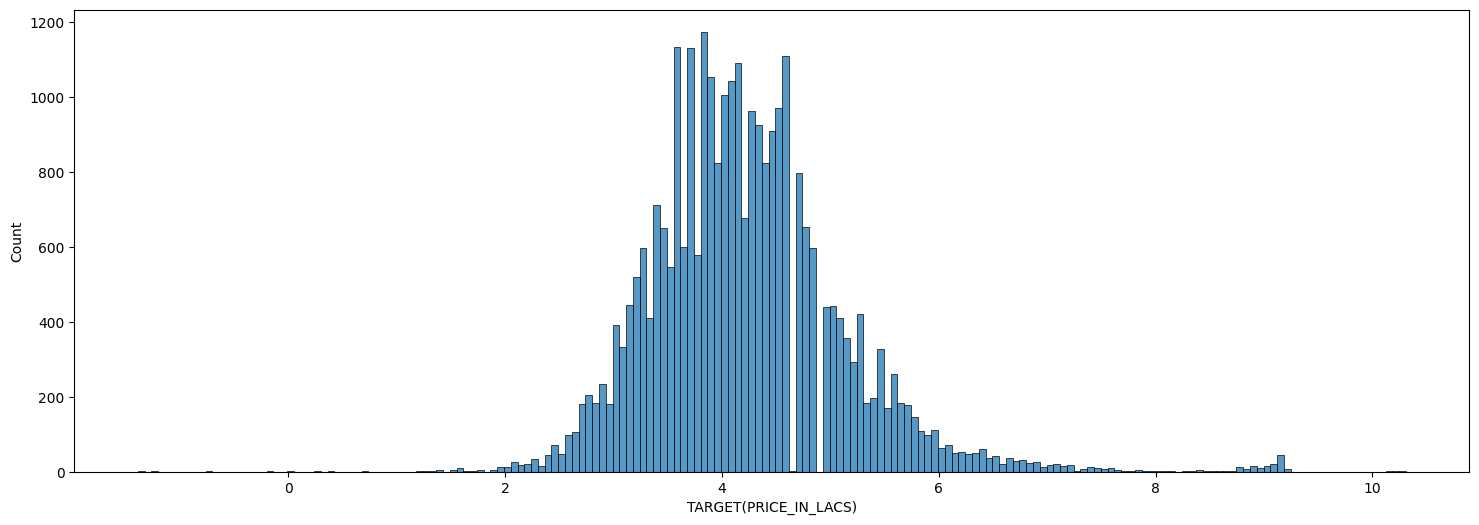

In [11]:
sns.histplot(np.log(df_train["TARGET(PRICE_IN_LACS)"]))

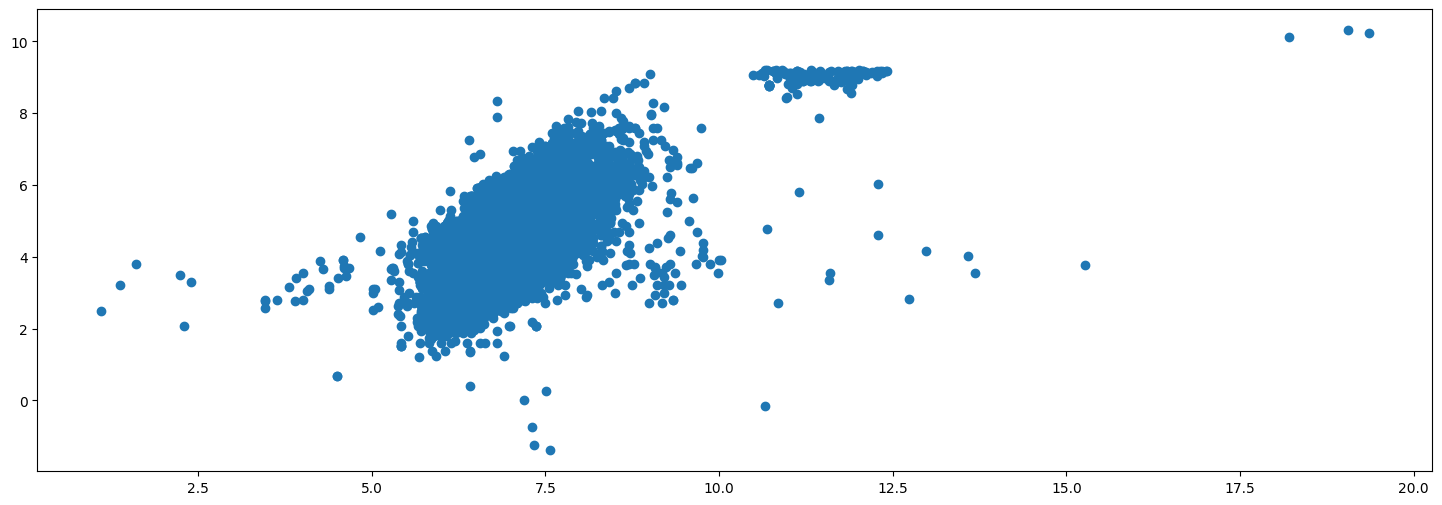

In [12]:
# check the relationship between square ft and the price
# does sqaure ft influences price?
plt.scatter(x=np.log(df_train["SQUARE_FT"]), y=np.log(df_train["TARGET(PRICE_IN_LACS)"]))

# looks like it does

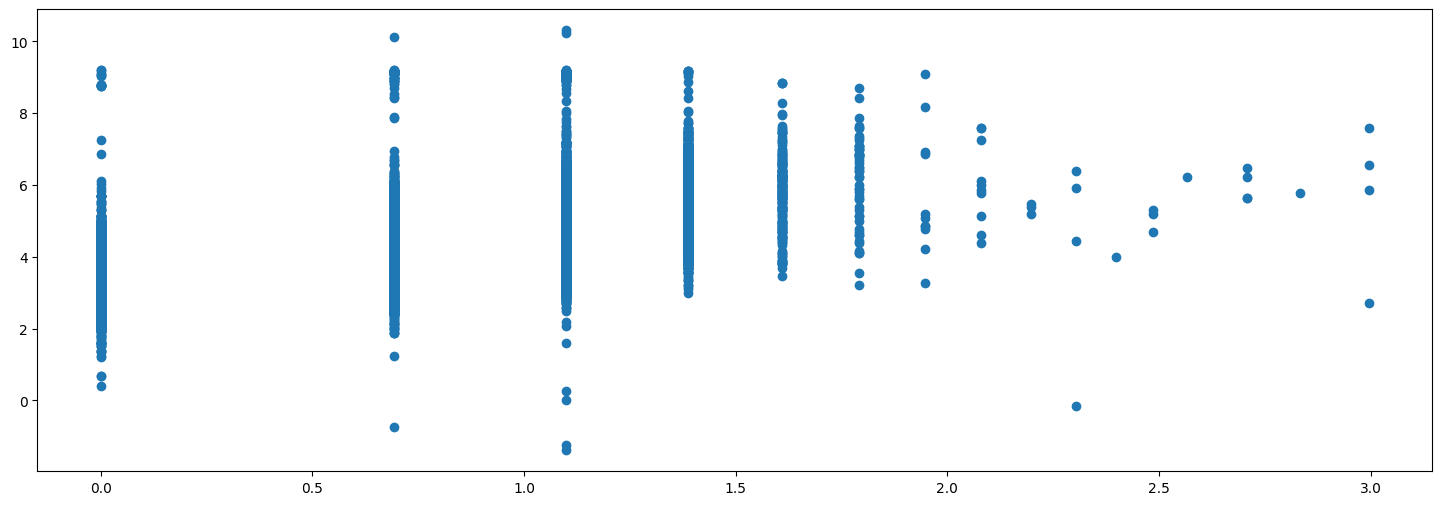

In [13]:
plt.scatter(x=np.log(df_train["BHK_NO."]), y=np.log(df_train["TARGET(PRICE_IN_LACS)"]))

In [14]:
# which city is most popular?
new_df = df_train['ADDRESS'].str.split(',').str.get(1)
city_counts = new_df.value_counts().head(5)


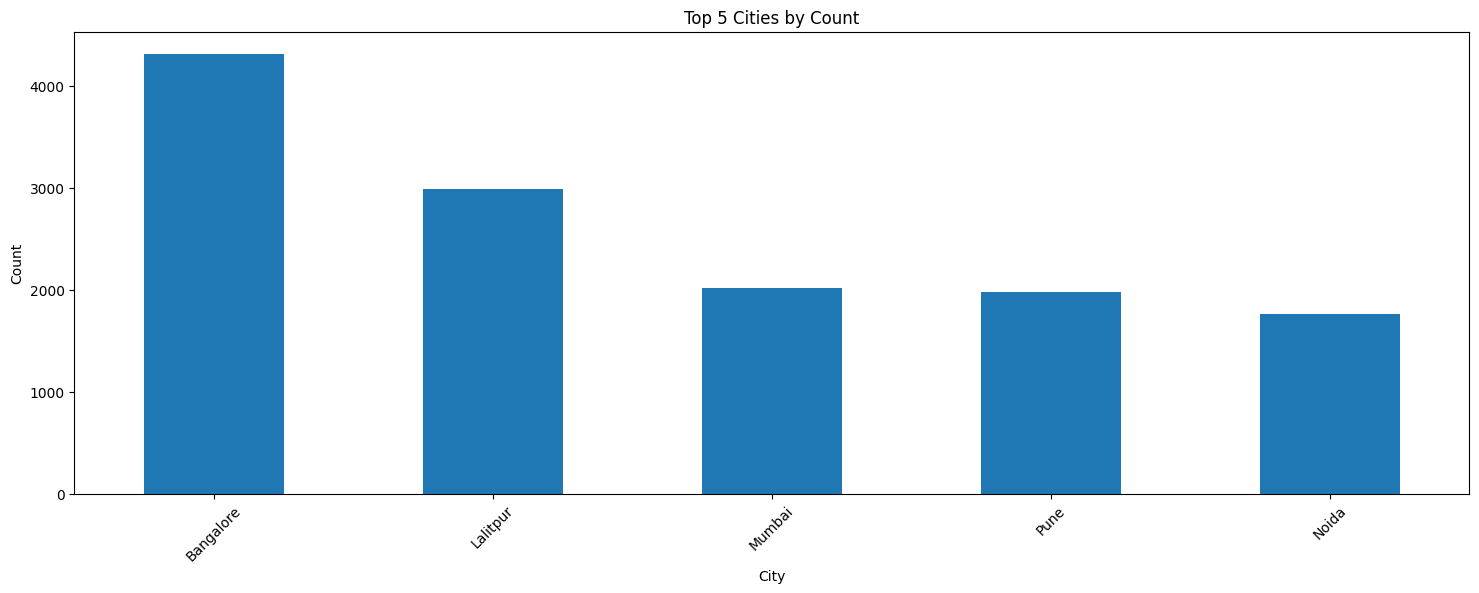

In [15]:
city_counts.plot(kind='bar')
plt.title('Top 5 Cities by Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# make a copy so that we need not have to restart the notebook should we mess up the data.
df_train_copy = df_train.copy()

#### Data Preprocessing
- Check Missing Data
    - since there is no missing data, we skip this part.
- Check any redundant data, if present drop them
- Standardization/Normalization
- Encoding the Categorical Variables

In [17]:
df_train.duplicated().sum()
print(f"There are {df_train[df_train.duplicated()].shape[0]} duplicates in training dataset.")


There are 401 duplicates in training dataset.


In [18]:
# let's drop the duplicates
df_train.drop_duplicates(inplace=True)

In [19]:
df_train.duplicated().sum()

0

In [20]:
# now let's remove the uwanted columns, as they do
df_train = df_train.drop(['ADDRESS'], axis=1)


#### Encoding Categorical Variable

In [21]:

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Label encoding function
def label_encoder(X):
    X_transformed = X.copy()
    for column in X.columns:
        le = LabelEncoder()
        X_transformed[column] = le.fit_transform(X[column])
    return X_transformed



In [22]:
# Define the preprocessing steps for categorical features
categorical_features = ['POSTED_BY', 'BHK_OR_RK']
categorical_transformer = Pipeline(steps=[
    ('label_encoder', FunctionTransformer(label_encoder, validate=False))
])


#### Standardizing

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Define the preprocessing steps for numerical features
numerical_features_standard = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE']
numerical_transformer_standard = Pipeline(steps=[
    ('standard_scaler', StandardScaler())
])


In [25]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numerical', numerical_transformer_standard, numerical_features_standard)
    ],
    remainder='passthrough'  
)


#### Pipelining

In [26]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [27]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1, tol=None, warm_start=True))
])

In [28]:
LABELS = 'TARGET(PRICE_IN_LACS)'
train_features = [col for col in df_train.columns if col not in [LABELS]]
train_data = df_train[train_features]
train_labels = df_train[LABELS]

####  Splitting the dataset

In [29]:
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, random_state=42, test_size = 0.2)

print(f"The shape of training dataset is: {train_data.shape}")
print(train_data.shape)


print(f"The shape of training dataset is: {train_data.shape}")
print(valid_data.shape)


The shape of training dataset is: (23240, 10)
(23240, 10)
The shape of training dataset is: (23240, 10)
(5810, 10)


In [30]:
test_features = [col for col in df_test.columns if col not in [LABELS]]
test_data = df_test[test_features]


#### Finding the best hyperparameters

In [31]:
# initial search
param_grid = {
    'regressor__loss': ['squared_error'],
    'regressor__penalty': ['l2', 'l1'],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__l1_ratio': [0.0, 0.1, 0.5],
    'regressor__eta0': [0.001, 0.01, 0.1],
}


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(train_data, train_labels)


/home/suman/.conda/envs/documentai/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('label_encoder',
                                                                                          FunctionTransformer(func=<function label_encoder at 0x7fcfd92a1800>))]),
                                                                         ['POSTED_BY',
                                                                          'BHK_OR_RK']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['BHK_NO.',
                                                                          'SQUARE_FT',
                                                                          'LONGITUDE',
                                                                          'LATITUDE'])])),
                                       ('regressor',
                                        SGDRegressor(max_iter=1, tol=None,
                                                     warm_start=True))]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01],
                         'regressor__eta0': [0.001, 0.01, 0.1],
                         'regressor__l1_ratio': [0.0, 0.1, 0.5],
                         'regressor__loss': ['squared_error'],
                         'regressor__penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

In [34]:
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'The best model is : {best_model} with parameters {best_parameters}')

The best model is : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function label_encoder at 0x7fcfd92a1800>))]),
                                                  ['POSTED_BY', 'BHK_OR_RK']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['BHK_NO.', 'SQUARE_FT',
                                                   'LONGITUDE',
                                                   'LATITUDE'])])),
                ('regressor',
                 SGDRegressor(eta0=0.001, l1_

In [35]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(alpha= 0.0001, eta0= 0.001, l1_ratio = 0.0,
                               loss= 'squared_error', penalty= 'l1',
                               tol= 0.01, max_iter=2000, warm_start=True))
])

#### Fit the model with best parameters and estimate

In [36]:
pipeline.fit(train_data, train_labels)

/home/suman/.conda/envs/documentai/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function label_encoder at 0x7fcfd92a1800>))]),
                                                  ['POSTED_BY', 'BHK_OR_RK']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['BHK_NO.', 'SQUARE_FT',
                                                   'LONGITUDE',
                                                   'LATITUDE'])])),
                ('regressor',
                 SGDRegressor(eta0=0.001, l1_ratio=0.0, max_iter=2000,
                              penalty='l1', tol=0.01, warm_start=True))])

In [37]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(alpha= 0.0001, eta0= 0.001, l1_ratio = 0.0,
                               loss= 'squared_error', penalty= 'l1',
                               tol= 0.01, max_iter=2000, warm_start=True))
])

In [38]:
pipeline.fit(train_data, train_labels)

/home/suman/.conda/envs/documentai/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function label_encoder at 0x7fcfd92a1800>))]),
                                                  ['POSTED_BY', 'BHK_OR_RK']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['BHK_NO.', 'SQUARE_FT',
                                                   'LONGITUDE',
                                                   'LATITUDE'])])),
                ('regressor',
                 SGDRegressor(eta0=0.001, l1_ratio=0.0, max_iter=2000,
                              penalty='l1', tol=0.01, warm_start=True))])

#### Evaluation of the model

In [39]:
y_hat = pipeline.predict(valid_data)
print(f'Mean Squared Error: {mean_squared_error(valid_labels, y_hat)}')


Mean Squared Error: 378435.8539077567


In [40]:

print(f'Mean Absolute Error: {mean_absolute_error(valid_labels, y_hat)}')


Mean Absolute Error: 135.96579072419206


In [41]:
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(valid_labels, y_hat))}')


Root Mean Square Error: 615.1714020561723


In [42]:
print(f'R2 score is : {r2_score(valid_labels, y_hat)}')

R2 score is : 0.3088774233519437


In [43]:
def show_distribution_plot(y_true, y_pred, xlabel="", ylabel=""):
  plt.figure(figsize=(12, 6))
  ax1 = sns.kdeplot(y_true, color='r', label='Actual value')
  sns.kdeplot(y_pred, color='b', label='Fitted value', ax=ax1)

  plt.title('Distribution plot (Actual Label vs Predicted Label)')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.show()

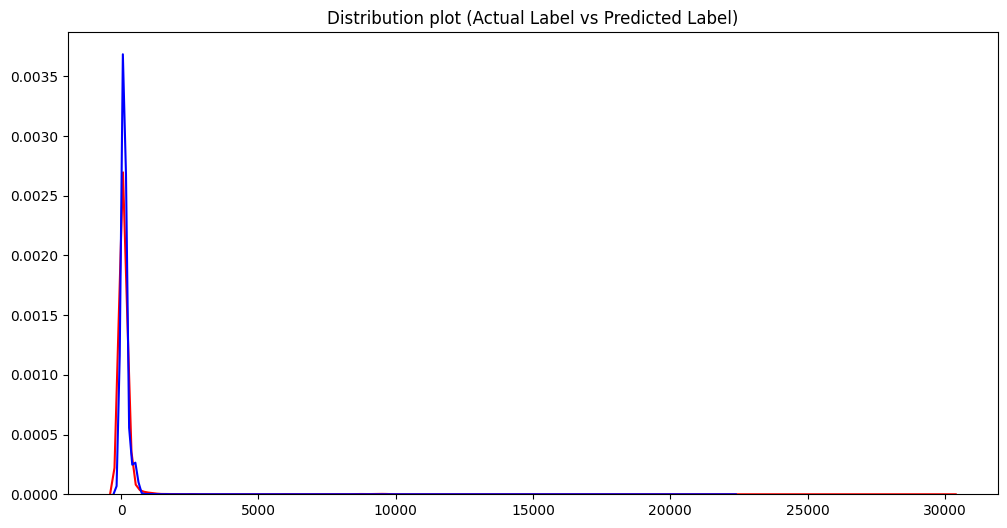

In [44]:
show_distribution_plot(valid_labels, y_hat)

#### Prediction

In [45]:
pred = pipeline.predict(test_data)

In [46]:
neg_index = np.where(pred < 0)
pred[neg_index] = np.abs(pred[neg_index])

In [47]:
pred

array([ 39.31517246, 478.74386283,  44.85543851, ..., 394.81795119,
        84.4035233 , 170.04528112])

## Stocastic Gradient Descent from Scratch

#### Algorithm

Certainly! Here's the algorithm for Stochastic Gradient Descent (SGD):

1. **Initialize Parameters**: 
   - Set initial values for parameters \( \theta \).
   - Choose learning rate \( \eta \) (step size).

2. **Repeat Until Convergence**:
   - Shuffle the dataset if necessary (optional for each epoch).
   - For each data point \( (x_i, y_i) \) in the dataset:
     1. Compute the gradient of the loss function with respect parameters
        
     2. Update the parameters using the gradients

3. **Return**: 
   - The optimized parameters

In [48]:
import numpy as np
from sklearn.utils import shuffle

class LinearRegression:
  def __init__(self,
               lr: float=0.001,
               epoch: int=10,
               clip_threshold: int=1):
    self.lr = lr
    self.epoch = epoch
    self.clip_threshold = clip_threshold

  def initialize_params(self, X):
    self.weights = np.random.randn(X.shape[1]) * (0.01)
    self.bias = 0

  def shuffle_data(self, X, y):
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
    return X_shuffled, y_shuffled

  def compute_loss(self, X, Y=None):
    Y_hat = self.weights @ X.T + self.bias
    self.loss = (Y - Y_hat)**2 if Y else None
    return self.loss, Y_hat

  def get_error(self, Y, Y_hat):
    return (Y-Y_hat)

  def gradient_clipping(self, weights_grad, bias_grad):
    weights_grad = np.clip(weights_grad, -self.clip_threshold, self.clip_threshold)
    bias_grad = np.clip(bias_grad, -self.clip_threshold, self.clip_threshold)

    return weights_grad, bias_grad

  def update_params(self, X, Y, Y_hat):
    error = self.get_error(Y, Y_hat)
    self.bias += (self.lr * error)
    self.weights += (self.lr * error * X)

  def print_training_stats(self, **kwargs):
    epoch = kwargs["epoch"]
    batch = kwargs["batch"]
    loss = kwargs["loss"]

    print("="*20)
    print(f"Epoch: {epoch}")
    print(f"Batch: {batch}")
    print(f"Loss: {loss}")

  def fit(self, X, Y):
    self.initialize_params(X)
    for i in range(self.epoch):
      print(f"Epoch: {i + 1}")
      X, Y = self.shuffle_data(X, Y)
      total_loss = 0
      for j in range(X.shape[0]):
        loss, Y_hat = self.compute_loss(X[j], Y[j])
        self.update_params(X[j], Y[j], Y_hat)
        total_loss += loss
      print(f"Average Loss: {total_loss/X.shape[0]}")
        # if j%1000 == 0:
        #   self.print_training_stats(
        #       epoch=i+1,
        #       batch=j+1,
        #       loss=loss
        #   )

  def predict(self, X):
    _, Y_hat = self.compute_loss(X)
    return Y_hat

In [49]:
# Training
# Stochastic Gradient Descent

# df_train_copy
X = df_train.drop("TARGET(PRICE_IN_LACS)", axis=1).values
Y = df_train["TARGET(PRICE_IN_LACS)"].values

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

lr_model = LinearRegression(lr=0.00001, epoch=30, clip_threshold=1)
lr_model.fit(X_train_scaled, y_train)

ValueError: could not convert string to float: 'Dealer'